# 과제2_2020150434_노지예  
## Q1. 부럽지가 않어  

In [ ]:
!pip install selenium 
!apt-get update
!apt install chromium-chromedriver

In [ ]:
import time
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from bs4 import BeautifulSoup

specific_options = webdriver.ChromeOptions()
specific_options.add_argument('--headless') 
specific_options.add_argument('--no-sandbox') 
driver = webdriver.Chrome('chromedriver', options = specific_options)

In [ ]:
driver.get('https://m.dhlottery.co.kr/gameResult.do?method=allWin')

# 기간 입력 박스
start_box=driver.find_element(By.NAME,'drwNoStart')
end_box=driver.find_element(By.NAME,'drwNoEnd')
# 조회 박스 
show_btn=driver.find_element(By.XPATH,'//*[@id="searchBtn"]/span')

number=int(input())
start_box.send_keys(number)
end_box.send_keys(number)
show_btn.click()

soup=BeautifulSoup(driver.page_source,'html.parser')
winner=soup.find_all('strong')

int(winner[1].text.strip()[5:])

905


7

## Q2. 시청률의 제왕  

In [ ]:
driver.get('https://www.nielsenkorea.co.kr/tv_terrestrial_day.asp?menu=Tit_1&sub_menu=1_1&area=01')
year_box=driver.find_element(By.NAME,'sYear')
month_box=driver.find_element(By.NAME,'sMonth')
day_box=driver.find_element(By.NAME,'sDay')

search_button=driver.find_element(By.XPATH,'//*[@id="sub_body"]/table[1]/tbody/tr/td/form/table/tbody/tr/td[2]/img')


year=input()+'년'
month=input()+'월'
if len(month)==2:
    month='0'+month
day=input()+'일'
if len(day)==2:
    day='0'+day


year_box.send_keys(year)
month_box.send_keys(month)
day_box.send_keys(day)

search_button.click()

soup=BeautifulSoup(driver.page_source,'html.parser')
programs=soup.find_all(class_='tb_txt')
top3=programs[0:3]
for element in top3:
    print(element.text.strip())

2022
6
1
KBS9시뉴스
아침마당
인간극장


## Q3. 종강  

In [ ]:
import requests
from bs4 import BeautifulSoup

header_info={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582'}

year=input()
month=input()
if len(month)==1:
    month='0'+month
day=input()
if len(day)==1:
    day='0'+day

url='https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date='+year+month+day

page=requests.get(url,headers=header_info)
page=page.text

soup=BeautifulSoup(page,'html.parser')
movies=soup.find_all(class_='tit5')

print(movies[0].text.strip())


2022
6
15
범죄도시2


## Q4. IQR  

In [ ]:
import pandas as pd

score=pd.read_csv('score.csv')
q1=score['TotalScore'].quantile(0.25) # 1st quantile
q3=score['TotalScore'].quantile(0.75) # 3rd quantile
IQR=q3-q1

LB=q1-1.5*IQR # Lower Bound
UB=q3+1.5*IQR # Upper Bount

for i in range(0,len(score)):
    if (score['TotalScore'][i]<=LB):
        print(score['StudentNumber'][i],'학생 할 수 있어요!')
    elif (score['TotalScore'][i]>=UB):
        print(score['StudentNumber'][i],'학생 대단합니다!')

2021826381 학생 할 수 있어요!
2017936402 학생 대단합니다!
2019396026 학생 대단합니다!
2021029260 학생 할 수 있어요!


## Q5. 고등학교  

In [ ]:
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt 
plt.rc('font', family='NanumBarunGothic')

import pandas as pd
import seaborn as sns

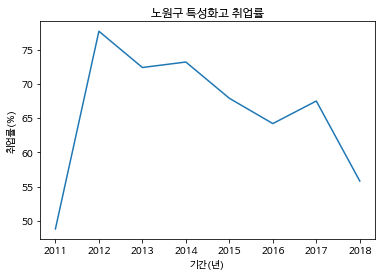

In [ ]:
# 1) 노원구 특성화고의 8년간 취업률 변화를 꺾은선 그래프 형태로 시각화하시오.
job=pd.read_excel('job.xlsx')
job_nowon=job[job['자치구']=='노원구']

job_nowon=job_nowon.set_index('기간',drop=True)

job_nowon['취업률'].plot()
plt.title('노원구 특성화고 취업률')
plt.xlabel('기간(년)')
plt.ylabel('취업률(%)')
plt.show()

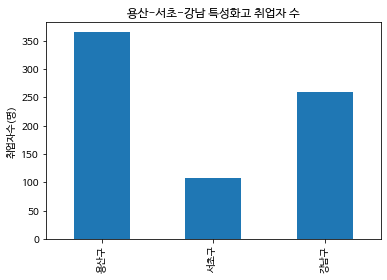

In [ ]:
# 2) 2014년 기준, 용산구-서초구-강남구 특성화고의 취업자 수를 막대 그래프로 나타내시오.
cond1=job['기간']==2014
cond2=(job['자치구']=='용산구')|(job['자치구']=='서초구')|(job['자치구']=='강남구')
job_new=job[cond1&cond2]
job_new.index=["용산구","서초구","강남구"]

job_new['취업자 수'].plot(kind='bar',x='자치구')
plt.title('용산-서초-강남 특성화고 취업자 수')
plt.ylabel('취업자수(명)')
plt.show()

Text(0.5, 1.0, '2017년 졸업자 수-취업자 수')

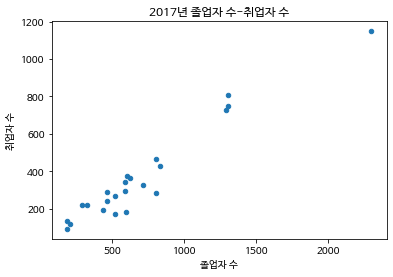

In [ ]:
# 3) 2017년 기준, 구 별 특성화고 졸업자 수와 취업자 수를 산점도로 나타내시오.

job_2017=job[job['기간']==2017] # 서울시 전체 데이터 포함
job_2017=job_2017.loc[145:,:] # 서울시 제거 

job_2017.plot(kind='scatter',x='졸업자 수',y='취업자 수')
plt.title('2017년 졸업자 수-취업자 수')